# Webscraping and Natural Language Processing

In [2]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/q7AM9QjCRrI" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

### Investigating texts from Project Gutenberg

![](images/gutenberg.png)

### List Review

In [3]:
a = [i for i in ['Uncle', 'Stever', 'has', 'a', 'gun']]

In [4]:
a

['Uncle', 'Stever', 'has', 'a', 'gun']

In [5]:
a[0]

'Uncle'

In [6]:
b = [i.lower() for i in a]

In [7]:
b

['uncle', 'stever', 'has', 'a', 'gun']

### Scraping the Text

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [9]:
url = "http://www.gutenberg.org/files/15784/15784-0.txt"

In [10]:
response = requests.get(url)

In [11]:
type(response)

requests.models.Response

In [12]:
response

<Response [200]>

In [13]:
soup_dos = BeautifulSoup(response.content, "html.parser")

In [14]:
len(soup_dos)

1

In [15]:
dos_text = soup_dos.get_text()

In [16]:
type(dos_text)

str

In [17]:
len(dos_text)

550924

In [18]:
dos_text[:100]

'The Project Gutenberg EBook of The Chronology of Ancient Kingdoms Amended\r\nby Isaac Newton\r\n\r\nThis e'

### Using Regular Expressions

![](https://imgs.xkcd.com/comics/regular_expressions.png)

Regular expressions are a way to parse text using symbols to represent different kinds of textual characters.  For example, in the above sentence, notice that we have some symbols that are only there to impart formatting.  If we want to remove these, and only have the textual pieces, we can use a regular expression to find only words. 

In [19]:
import re

In [20]:
a = 'Who knew Johnny Depp was an undercover police officer (with Richard Greico)!'

In [21]:
ds = 'd\w+'

In [22]:
re.findall(ds, a)

['dercover']

In [23]:
ds = 'D\w+' #finds any occurance of D followed by letters 

In [24]:
re.findall(ds, a)

['Depp']

In [25]:
ds = '[dD]\w+' #set of letters (lower or upper d)

In [26]:
re.findall(ds, a)

['Depp', 'dercover']

In [27]:
words = re.findall('\w+', dos_text)

In [28]:
words[:10]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 'The',
 'Chronology',
 'of',
 'Ancient',
 'Kingdoms']

### Tokenization

Turning the document into a collection of individual items -- words.

In [29]:
from nltk.tokenize import RegexpTokenizer

In [30]:
tokenizer = RegexpTokenizer('[a-zA-Z]\w+[^\_\\r\\n__.:\-\"" ]') #anything starting with lower or uppercase a-z

In [31]:
tokens = tokenizer.tokenize(dos_text)

In [32]:
tokens[:8]

['The',
 'Project',
 'Gutenberg',
 'EBook',
 'The',
 'Chronology',
 'Ancient',
 'Kingdoms']

In [33]:
words = []
for word in tokens:
    words.append(word.lower())

In [34]:
words[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac']

### Stopwords

In [35]:
from nltk.corpus import stopwords

In [36]:
import nltk
nltk.download('stopwords') #get rid of those stop words !!! - import

[nltk_data] Downloading package stopwords to /Users/mmann/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
stop_words = set(stopwords.words('english')) #creating a set of stopwords

In [38]:
wordage = [word.strip() for word in words if word.isalpha()]

In [39]:
wordage[:10]

['the',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac']

In [40]:
stop_words = set(stopwords.words('english'))
wordin = [w for w in words if not w in stop_words] #if words are in stopwords we do not! use
print(wordin[:100])

['project', 'gutenberg', 'ebook', 'chronology', 'ancient', 'kingdoms', 'amended', 'isaac', 'newton', 'ebook', 'use', 'anyone', 'anywhere', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'it,', 'give', 'away', 'use', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'www', 'gutenberg', 'net', 'title', 'chronology', 'ancient', 'kingdoms', 'amended', "prefix'", 'short', 'chronicle', 'first', 'memory', 'things', 'europe,', 'conquest', 'persia', 'alexander', 'great', 'author', 'isaac', 'newton', 'release', 'date', 'may', 'ebook', 'language', 'english', 'character', 'set', 'encoding', 'unicode', 'utf', 'start', 'project', 'gutenberg', 'ebook', 'chronology', 'ancient', 'produced', 'robert', 'shimmin,', 'keith', 'edkins', 'online', 'distributed', 'proofreading', 'team', 'chronology', 'ancient', 'kingdoms', 'amended', "prefix'", 'short', 'chronicle', 'first', 'memory', 'things', 'europe_,', 'conquest', 'persia', 'alexander', 'great', 'sir', 'isaac', 'new

### Analyzing the Text with NLTK

The Natural Language Toolkit is a popular Python library for text analysis.  We will use it to split the text into individual words(tokens), and create a plot of the frequency distribution of the tokens.  

In [41]:
import nltk

In [42]:
text = nltk.Text(wordin)

In [43]:
text[:10]

['project',
 'gutenberg',
 'ebook',
 'chronology',
 'ancient',
 'kingdoms',
 'amended',
 'isaac',
 'newton',
 'ebook']

In [44]:
fdist = nltk.FreqDist(text)

In [45]:
type(fdist)

nltk.probability.FreqDist

In [46]:
fdist.most_common(10)

[('years', 413),
 ('year', 346),
 ('king', 340),
 ('son', 311),
 ('first', 263),
 ('reign', 249),
 ('one', 234),
 ('kings', 224),
 ('egypt', 222),
 ('called', 219)]

In [47]:
fdist['blood']

2

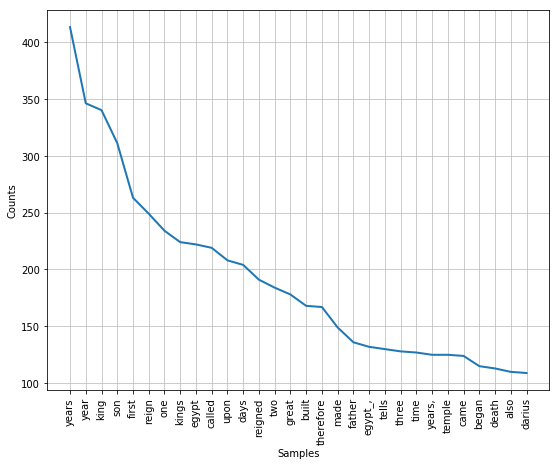

In [48]:
plt.figure(figsize = (9, 7))
fdist.plot(30)

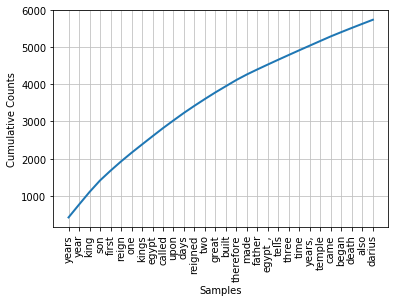

In [49]:
plt.figure()
fdist.plot(30, cumulative=True)

### Part of Speech Tagging

In [50]:
tagged = nltk.pos_tag(text)
#nltk.download('averaged_perceptron_tagger')

In [51]:
tagged[:10]

[('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('chronology', 'NN'),
 ('ancient', 'NN'),
 ('kingdoms', 'NNS'),
 ('amended', 'VBD'),
 ('isaac', 'JJ'),
 ('newton', 'NN'),
 ('ebook', 'NN')]

In [52]:
text.similar("king")

one kings reigns great raise subject time together empire egypt
solomon therefore also saith tells names priests days reigned trojan


In [53]:
text.common_contexts(["king", "brother"])

No common contexts were found


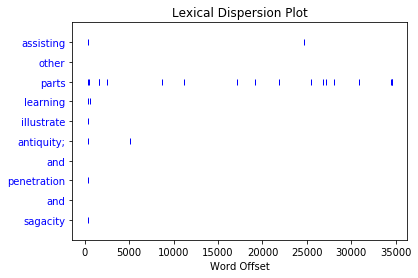

In [54]:
text.dispersion_plot(words[500:510])

### Lexical Richness of Text

In [55]:
len(text)

43749

In [56]:
len(set(text))/len(text)

0.22363939747194223

In [57]:
text.count("kings")

224

In [58]:
100*text.count("kings")/len(text)

0.5120117031246428

### Long Words, Bigrams, Collacations

In [59]:
long_words = [w for w in words if len(w)>10]

In [60]:
long_words[:10]

['restrictions',
 'distributed',
 'proofreading',
 'encouragement',
 'extraordinary',
 'productions',
 'protection;',
 'chronicle_,',
 'demonstration',
 'judiciousness']

In [61]:
list(nltk.bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [62]:
text.collocations()

project gutenberg; tells us,; anno nabonass; argonautic expedition;
hundred years; years death; year nabonassar; years piece; return
heraclides; literary archive; red sea_,; saith he,; red sea; one
another,; gutenberg electronic; alexander great; assyrian empire;
argonautic expedition,; trojan war,; gutenberg literary


In [63]:
df = pd.read_csv('data/jumpstreet.csv', index_col = 0)

NameError: name 'pd' is not defined

In [ ]:
df.head()

### Task

1. Scrape and tokenize a text from project Gutenberg.

2. Compare the most frequent occurring words with and without stopwords removed.

3. Examine the top bigrams.  Create a barplot of the top 10 bigrams.

4. Create a topic model using our `scikitlearn` pipeline from last class.  Visualize and discuss in terms of the book.



**Further Reading**:  http://www.nltk.org/book/

In [65]:
def gut_scraper(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    tt = soup.get_text()
    words = re.findall('\w+', dos_text)
    tokens = tokenizer.tokenize(dos_text)
    wrds = []
    for word in tokens:
        wrds.append(word.lower)
    fdist = nltk.FreqDist(wrds)
    plt.figure(figsize = (9, 7))
    fdist.plot(30)

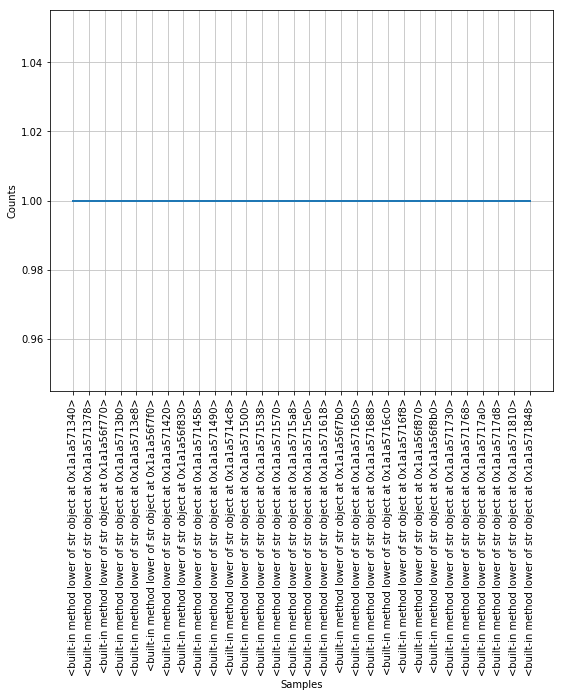

In [66]:
gut_scraper('http://www.gutenberg.org/cache/epub/35688/pg35688.txt')